In [14]:
import os
import json
import matplotlib.pyplot as plt

# saving details

In [92]:
def removeNone(arr):
    return [a for a in arr if a is not None]

In [137]:
result_dir = os.path.join('results', 'ligbuilder', '2v5z')

ligs_dir = os.listdir(result_dir)

for l in ligs_dir:
    print(l, os.listdir(os.path.join(result_dir, l)))

# reading sa-scores and docking-scores
lig_name = []
sa_scores = []
docked_scores = []
undocked_score = []

for l in ligs_dir:
    if os.path.exists(os.path.join(result_dir, l, 'details.txt')):
        with open(os.path.join(result_dir, l, 'details.txt')) as f:
            data = json.load(f)
            lig_name.append(l)
            sa_scores.append(data['synthesizability_score'])
            undocked_score.append(data['undocked_final_energy'])
            if 'docked_final_energy' in data:
                docked_scores.append(data['docked_final_energy'])
            else:
                docked_scores.append(None)



50 []
8 ['undocked_final_lig.pdbqt', 'state', 'docked_final_lig.pdbqt', 'details.txt']
36 ['undocked_final_lig.pdbqt', 'state', 'docked_final_lig.pdbqt', 'details.txt']
70 []
6 ['undocked_final_lig.pdbqt', 'state', 'details.txt']
35 ['undocked_final_lig.pdbqt', 'state', 'details.txt']
98 ['undocked_final_lig.pdbqt', 'state', 'details.txt']
43 ['undocked_final_lig.pdbqt', 'state', 'details.txt']
28 ['undocked_final_lig.pdbqt', 'state', 'details.txt']
34 ['undocked_final_lig.pdbqt', 'state', 'docked_final_lig.pdbqt', 'details.txt']
1 ['undocked_final_lig.pdbqt', 'state', 'docked_final_lig.pdbqt', 'details.txt']
76 ['undocked_final_lig.pdbqt', 'state', 'docked_final_lig.pdbqt', 'details.txt']
49 ['undocked_final_lig.pdbqt', 'state', 'details.txt']
85 []
7 ['undocked_final_lig.pdbqt', 'state', 'details.txt']
27 ['undocked_final_lig.pdbqt', 'state', 'details.txt']
54 ['undocked_final_lig.pdbqt', 'state', 'docked_final_lig.pdbqt', 'details.txt']
81 []
94 ['undocked_final_lig.pdbqt', 'state',

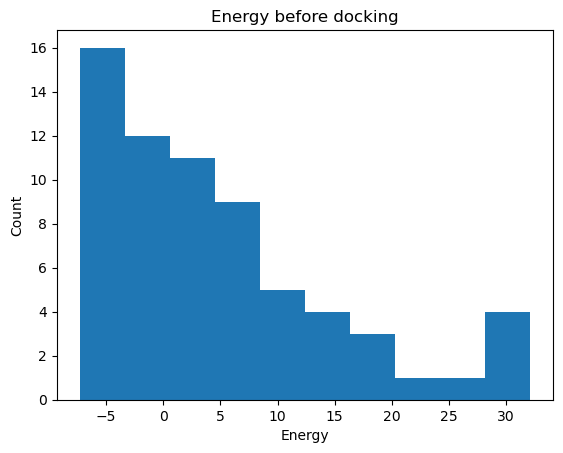

In [138]:
plt.hist(x=undocked_score, bins=10)
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title('Energy before docking')
plt.show()

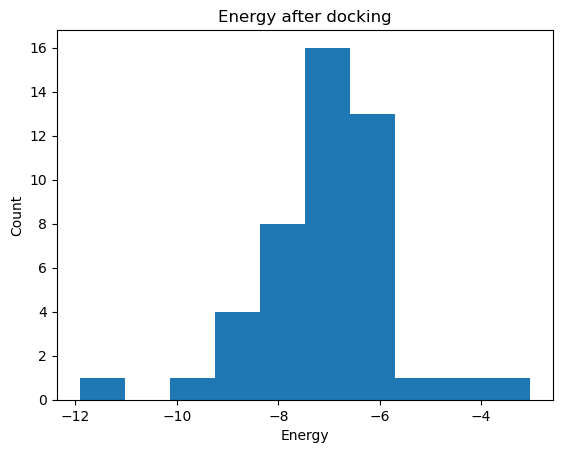

In [139]:
plt.hist(x=removeNone(docked_scores), bins=10)
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title('Energy after docking')
plt.show()

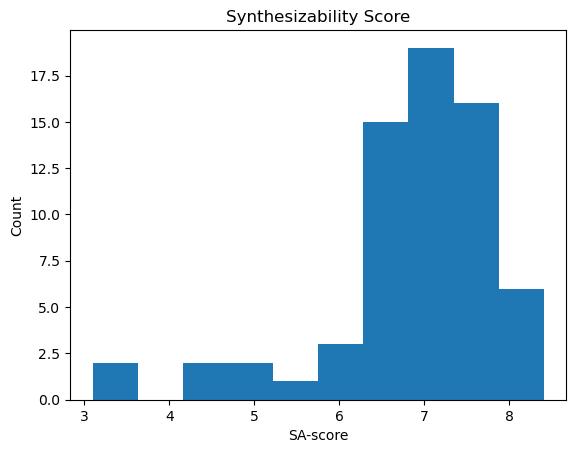

In [140]:
plt.hist(x=sa_scores, bins=10)
plt.xlabel('SA-score')
plt.ylabel('Count')
plt.title('Synthesizability Score')
plt.show()

In [141]:
# saving scores

with open(os.path.join('results', 'ligbuilder', '2v5z_scores.txt'), 'w') as f:
    for i in range(len(lig_name)):
        f.write(f'{lig_name[i]}:{docked_scores[i]}:{sa_scores[i]}\n')


In [143]:
base_dir = 'results/ligbuilder_1000/2v5z/'
undocked = 0
docked = 0
for dir in os.listdir(base_dir):
     x = len(os.listdir(os.path.join(base_dir, dir)))
     if x == 3: undocked += 1
     if x == 4: docked += 1



print(docked, undocked)

136 51
